In [52]:
# Import libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
weather = pd.read_csv('weather.csv')

In [54]:
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 1. Descriptions of attributes

Take a look at the dataset to see what attributs we have and what is the name of each attribute then check whehter it is able to provide a corresponding description based on the column's name or there are any anonymous attributes in the dataset

In [55]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   Evaporation    123710 non-null  float64
 6   Sunshine       123710 non-null  float64
 7   WindGustDir    123710 non-null  object 
 8   WindGustSpeed  123710 non-null  float64
 9   WindDir9am     123710 non-null  object 
 10  WindDir3pm     123710 non-null  object 
 11  WindSpeed9am   123710 non-null  float64
 12  WindSpeed3pm   123710 non-null  float64
 13  Humidity9am    123710 non-null  float64
 14  Humidity3pm    123710 non-null  float64
 15  Pressure9am    123710 non-null  float64
 16  Pressure3pm    123710 non-null  float64
 17  Cloud9am       123710 non-nul

| Columns | Description |
| ------ | ------ |
| Date | The date of observation |
| Location | The name of the location |
| MinTemp | The minimum temperature in degrees celsius |
| MaxTemp | The maximum temperature in degrees celsius |
| Rainfall | The amount of rainfall recorded for the day in mm |
| Evaporation | The so-called Class A pan evaporation (mm) in the 24 hours to 9am |
| Sunshine | The number of hours of bright sunshine in the day. |
| WindGustDir | The direction of the strongest wind gust in the 24 hours to midnight |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight |
| WindDir9am | Direction of the wind at 9am |
| WindDir3pm | Direction of the wind at 3pm |
| WindSpeed9am | Speed of the wind at 9am |
| WindSpeed3pm | Speed of the wind at 3pm  |
| Humidity9am  | Humidity at 9am |
| Humidity3pm | Humidity at 3pm  |
| Pressure9am | Pressure at 9am |
| Pressure3pm | Pressure3pm |
| Cloud9am | Cloud at 9am |
| Cloud3pm | Cloud at 3pm |
| Temp9am | Local temperature at 9am|
| Temp3pm | Local temperature at 3pm|
| RainToday | Whether it rains today |
| RainTomorrow | Whether it will rain tomorrow |

### 2. Data quality exploration and data cleaning

#### 2.1 Check missing values in the dataset

Generally, verifying the data quality can start with checking the uniqueness of the entire dataset. Checking if the number of columns matches the data dictionary

In [56]:
print('The number of rows that are duplicated:',weather.duplicated().sum())

The number of rows that are duplicated: 0


Check the number of missing values in each column

In [57]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [58]:
def missing_cal(df):
    """
    Calculated the number and the share of missing values for each column
    """
    number = df.isnull().sum()

    percentage= round(df.isnull().sum()*100
                     /df.shape[0]).astype(str)+'%'
    res = pd.concat([number,percentage],
                    axis=1,keys=['Number of Missing Values','Percentage'])
    res = res[['Number of Missing Values','Percentage']].sort_values(
           by = 'Number of Missing Values',ascending=False)
    return res

In [59]:
missing_cal(weather)

,Number of Missing Values,Percentage
Date,0,0.0%
WindSpeed3pm,0,0.0%
RainToday,0,0.0%
Temp3pm,0,0.0%
Temp9am,0,0.0%
Cloud3pm,0,0.0%
Cloud9am,0,0.0%
Pressure3pm,0,0.0%
Pressure9am,0,0.0%
Humidity3pm,0,0.0%


Before the missing values are treated, all the columns need to be split into two types: categorical attributes and numerical attributes. The methods used to treat the missing values would vary with the data type

In [60]:
# Split the columns based on their data type

# categorical data
categorical_cols = []
# numerical data
numerical_cols = []

for col in weather.columns:
    if weather[col].dtype=='object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

        
assert len(categorical_cols) + len(numerical_cols) == weather.shape[1]

#### 2.2 Dealing with the missing values in categorical attributes

The columns RainToday and RainTomorrow both are binary attributes, and based on the result below; these two columns are met the requirement that there are no more than two unique values

In [61]:
weather[categorical_cols].nunique()

Date            3417
Location          47
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [62]:
for col in categorical_cols:
    if col =='Date':
        continue
    print(weather[col].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
['No' 'Yes']
['No' 'Yes']


For the categorical data, missing values might not be exactly represented by np.nan, and they could be in other forms such as space ' ' or hyphen '-'. 

In [63]:
for col in categorical_cols:
    if weather[col].isin([' ','-']).sum()!=0:
        print(col)

In [64]:
missing_cal(weather[categorical_cols])

,Number of Missing Values,Percentage
Date,0,0.0%
Location,0,0.0%
WindGustDir,0,0.0%
WindDir9am,0,0.0%
WindDir3pm,0,0.0%
RainToday,0,0.0%
RainTomorrow,0,0.0%


In [65]:
weather.dropna(subset=['RainTomorrow'],inplace =True)

In [66]:
missing_cal(weather[categorical_cols])

,Number of Missing Values,Percentage
Date,0,0.0%
Location,0,0.0%
WindGustDir,0,0.0%
WindDir9am,0,0.0%
WindDir3pm,0,0.0%
RainToday,0,0.0%
RainTomorrow,0,0.0%


In [67]:
for col in categorical_cols:
    if col =='Date':
        continue
    print(weather[col].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
['No' 'Yes']
['No' 'Yes']


Given the relatively small value of the percentages, the missing values will be directly removed at this stage

In [68]:
weather.dropna(subset=categorical_cols,inplace =True)

#### 2.3 Dealing with the missing values in numerical attributes

Take a look at the statistic metrics for all these numerical attributes to see if there are any abnormal values. For example, humidity is a ratio which means the maximum value of humidity is just 100% and values greater than 100% should be capped at 100%

In [69]:
weather[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.413921,23.474727,2.375661,5.278091,8.121906,40.685280,15.011689,19.174578,67.665290,50.850271,1017.398281,1015.010746,4.628874,4.689702,17.268609,21.893884
std,6.366791,7.205902,8.528039,3.269193,2.816221,13.388636,8.307285,8.571039,18.975568,20.839435,6.765371,6.703515,2.298830,2.139233,6.477895,7.005957
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.800000,18.100000,0.000000,4.200000,8.200000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000
50%,12.200000,23.000000,0.000000,4.800000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.400000,1015.000000,5.000000,5.000000,16.900000,21.400000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


It is worth checking whether there are any outliers in these columns as the method used to impute missing values will base on how the observations distribute. A standard method to check whether there are outliers is through statistical metrics. Any observations are out of the 3-sigma limits would be considered outliers

In [70]:
def is_outlier(df,col):
    """
    check whether a column contains outliers
    """
    upper_bound = df[col].mean() + 3 * df[col].std()
    lower_bound = df[col].mean() - 3 * df[col].std()
    if df[col].max()>upper_bound or df[col].min()<lower_bound:
        print(col,'has outliers!')
        outliers_cols

In [71]:
outliers_cols = []
for col in numerical_cols:
    is_outlier(weather,col)
    outliers_cols.append(col)

MinTemp has outliers!
MaxTemp has outliers!
Rainfall has outliers!
Evaporation has outliers!
WindGustSpeed has outliers!
WindSpeed9am has outliers!
WindSpeed3pm has outliers!
Humidity9am has outliers!
Pressure9am has outliers!
Pressure3pm has outliers!
Temp9am has outliers!
Temp3pm has outliers!


In [72]:
len(numerical_cols)==len(outliers_cols)

True

From the box charts below, it is obvious that there are lots of outliers in these columns

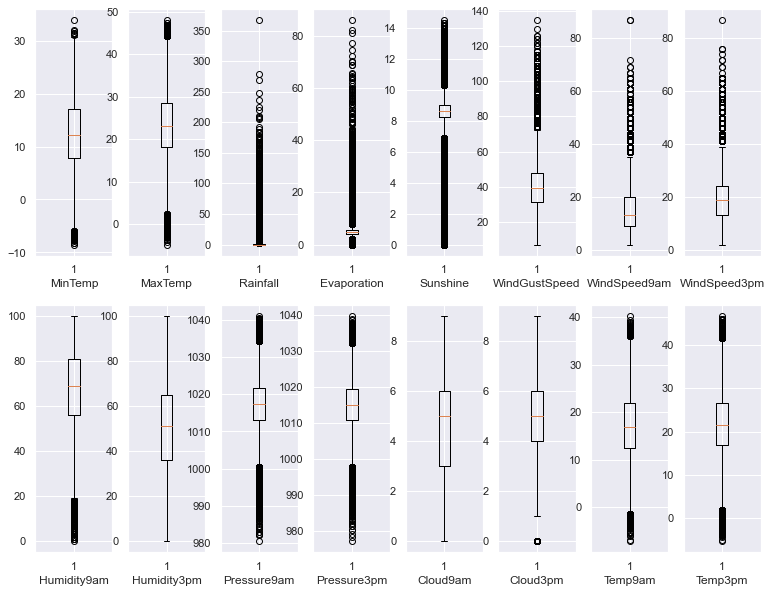

In [73]:
plt.figure(figsize=(13,10))
position=1
for col in numerical_cols:
    plt.subplot(2, 8, position)
    plt.boxplot(weather[col])
    plt.xlabel(col)
    position+=1

As all the numerical columns that contain missing values have outliers, all missing values will be replaced with the median of the corresponding column

In [74]:
for col in numerical_cols:
    weather[col].fillna(weather[col].median(),inplace =True)

In [75]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [76]:
print('Data quality has been done!')

Data quality has been done!


In [77]:
weather.to_csv('weatherAUS_cleaned.csv',index=0)

### 3. Data exploratory analysis

#### 3.1 Label distribution

The goal of this report is to see the relationship between rainy weather and atmospheric data, so the column 'RainTomorrow' is the label in this case

In [78]:
rain = weather['RainTomorrow']
print(f'Percentage of rainy weather:{round(rain.value_counts(normalize=True)[1]*100,2)} %  --> ({rain.value_counts()[1]} samples)\nPercentage of no rainy: {round(rain.value_counts(normalize=True)[0]*100,2)} %  --> ({rain.value_counts()[0]} samples)')

Percentage of rainy weather:22.14 %  --> (27392 samples)
Percentage of no rainy: 77.86 %  --> (96318 samples)


In the past ten years'data, there are 123,710 samples in total. Only 22.14% of samples are rainy weather which means the distribution of the label is unbalanced

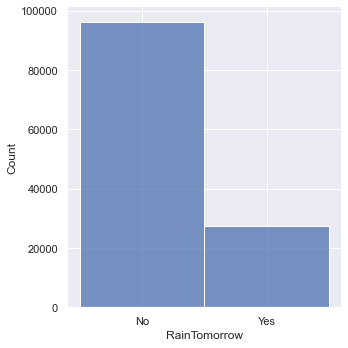

In [79]:
sns.displot(rain)

#### 3.2 Correlation analysis

In order to calculate the correlation matrix, how each attribute is correlated with the label depends on the score calculated by an embeded funciton in pandas called '.corr'

In [80]:
# Covert the label to numerical data

weather['RainTomorrow'].replace(to_replace='Yes', value=1, inplace=True)
weather['RainTomorrow'].replace(to_replace='No', value=0, inplace=True)

In [81]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [82]:
# Convert all the catergorical values to dummy variables
feature_list = ['Sunshine', 'Humidity3pm','Cloud3pm', 'RainTomorrow']

weather_dummies = pd.get_dummies(weather[feature_list])
print(weather_dummies)
weather_dummies.corr()['RainTomorrow'].sort_values(ascending = False)

        Sunshine  Humidity3pm  Cloud3pm  RainTomorrow
0            8.6         22.0       5.0             0
1            8.6         25.0       5.0             0
2            8.6         30.0       2.0             0
3            8.6         16.0       5.0             0
4            8.6         33.0       8.0             0
...          ...          ...       ...           ...
123705       8.6         27.0       5.0             0
123706       8.6         24.0       5.0             0
123707       8.6         21.0       5.0             0
123708       8.6         24.0       5.0             0
123709       8.6         24.0       2.0             0

[123710 rows x 4 columns]


RainTomorrow    1.000000
Humidity3pm     0.451723
Cloud3pm        0.297747
Sunshine       -0.334673
Name: RainTomorrow, dtype: float64

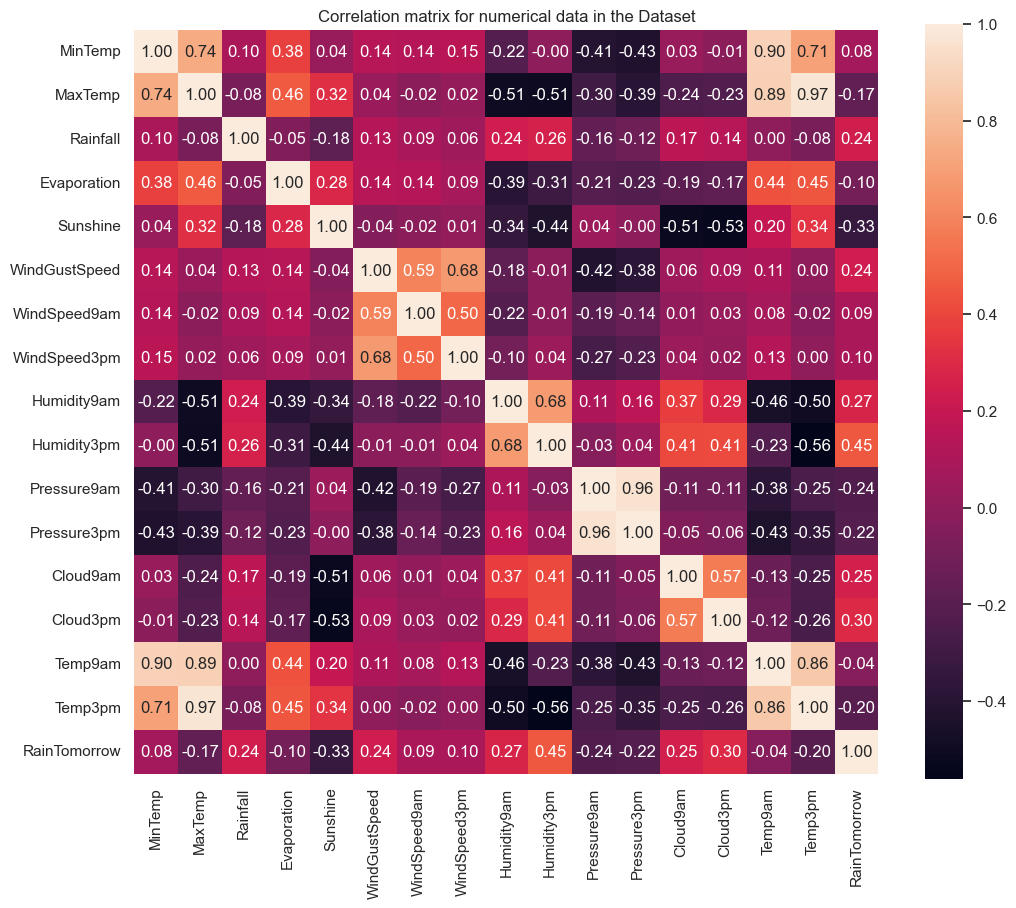

In [83]:
# Just check the correlation for the numerical data
plt.figure(figsize=(12,10),dpi = 100)
plt.title('Correlation matrix for numerical data in the Dataset')
ax = sns.heatmap(weather.corr(), square=True, annot=True, fmt='.2f', linecolor='white')       
plt.show()

<AxesSubplot:>

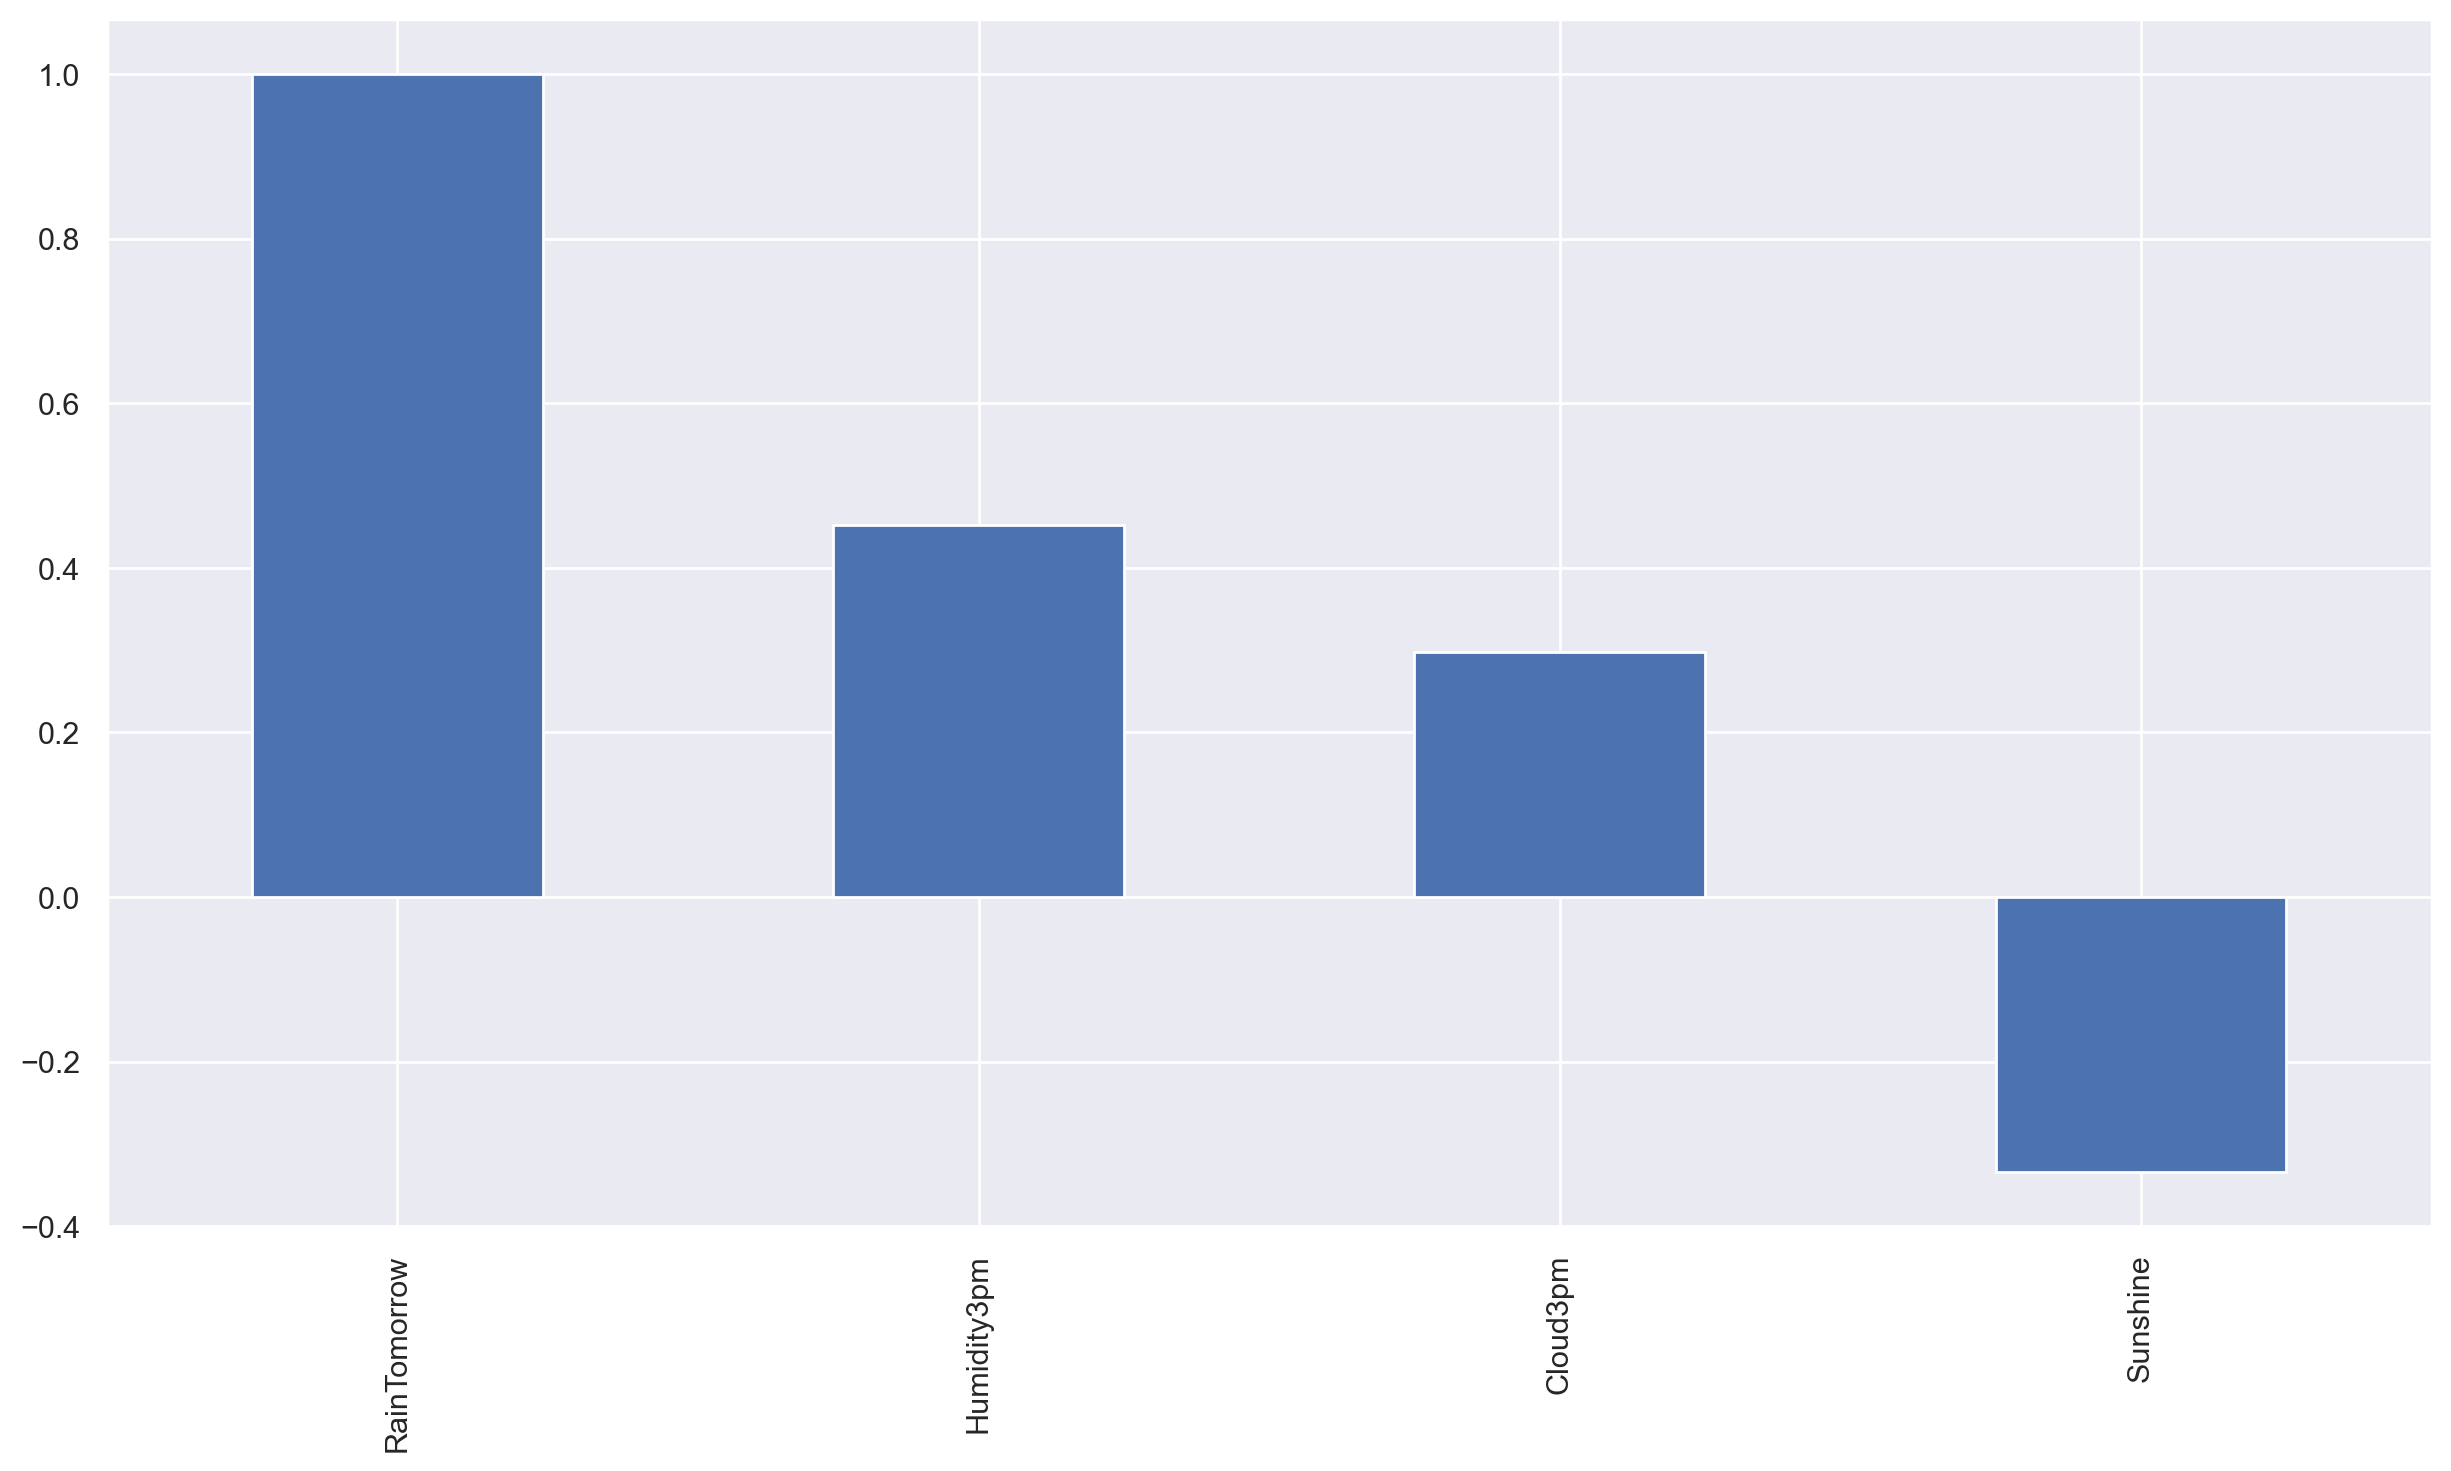

In [84]:
sns.set()
plt.figure(figsize=(15,8), dpi=200)

weather_dummies.corr()['RainTomorrow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

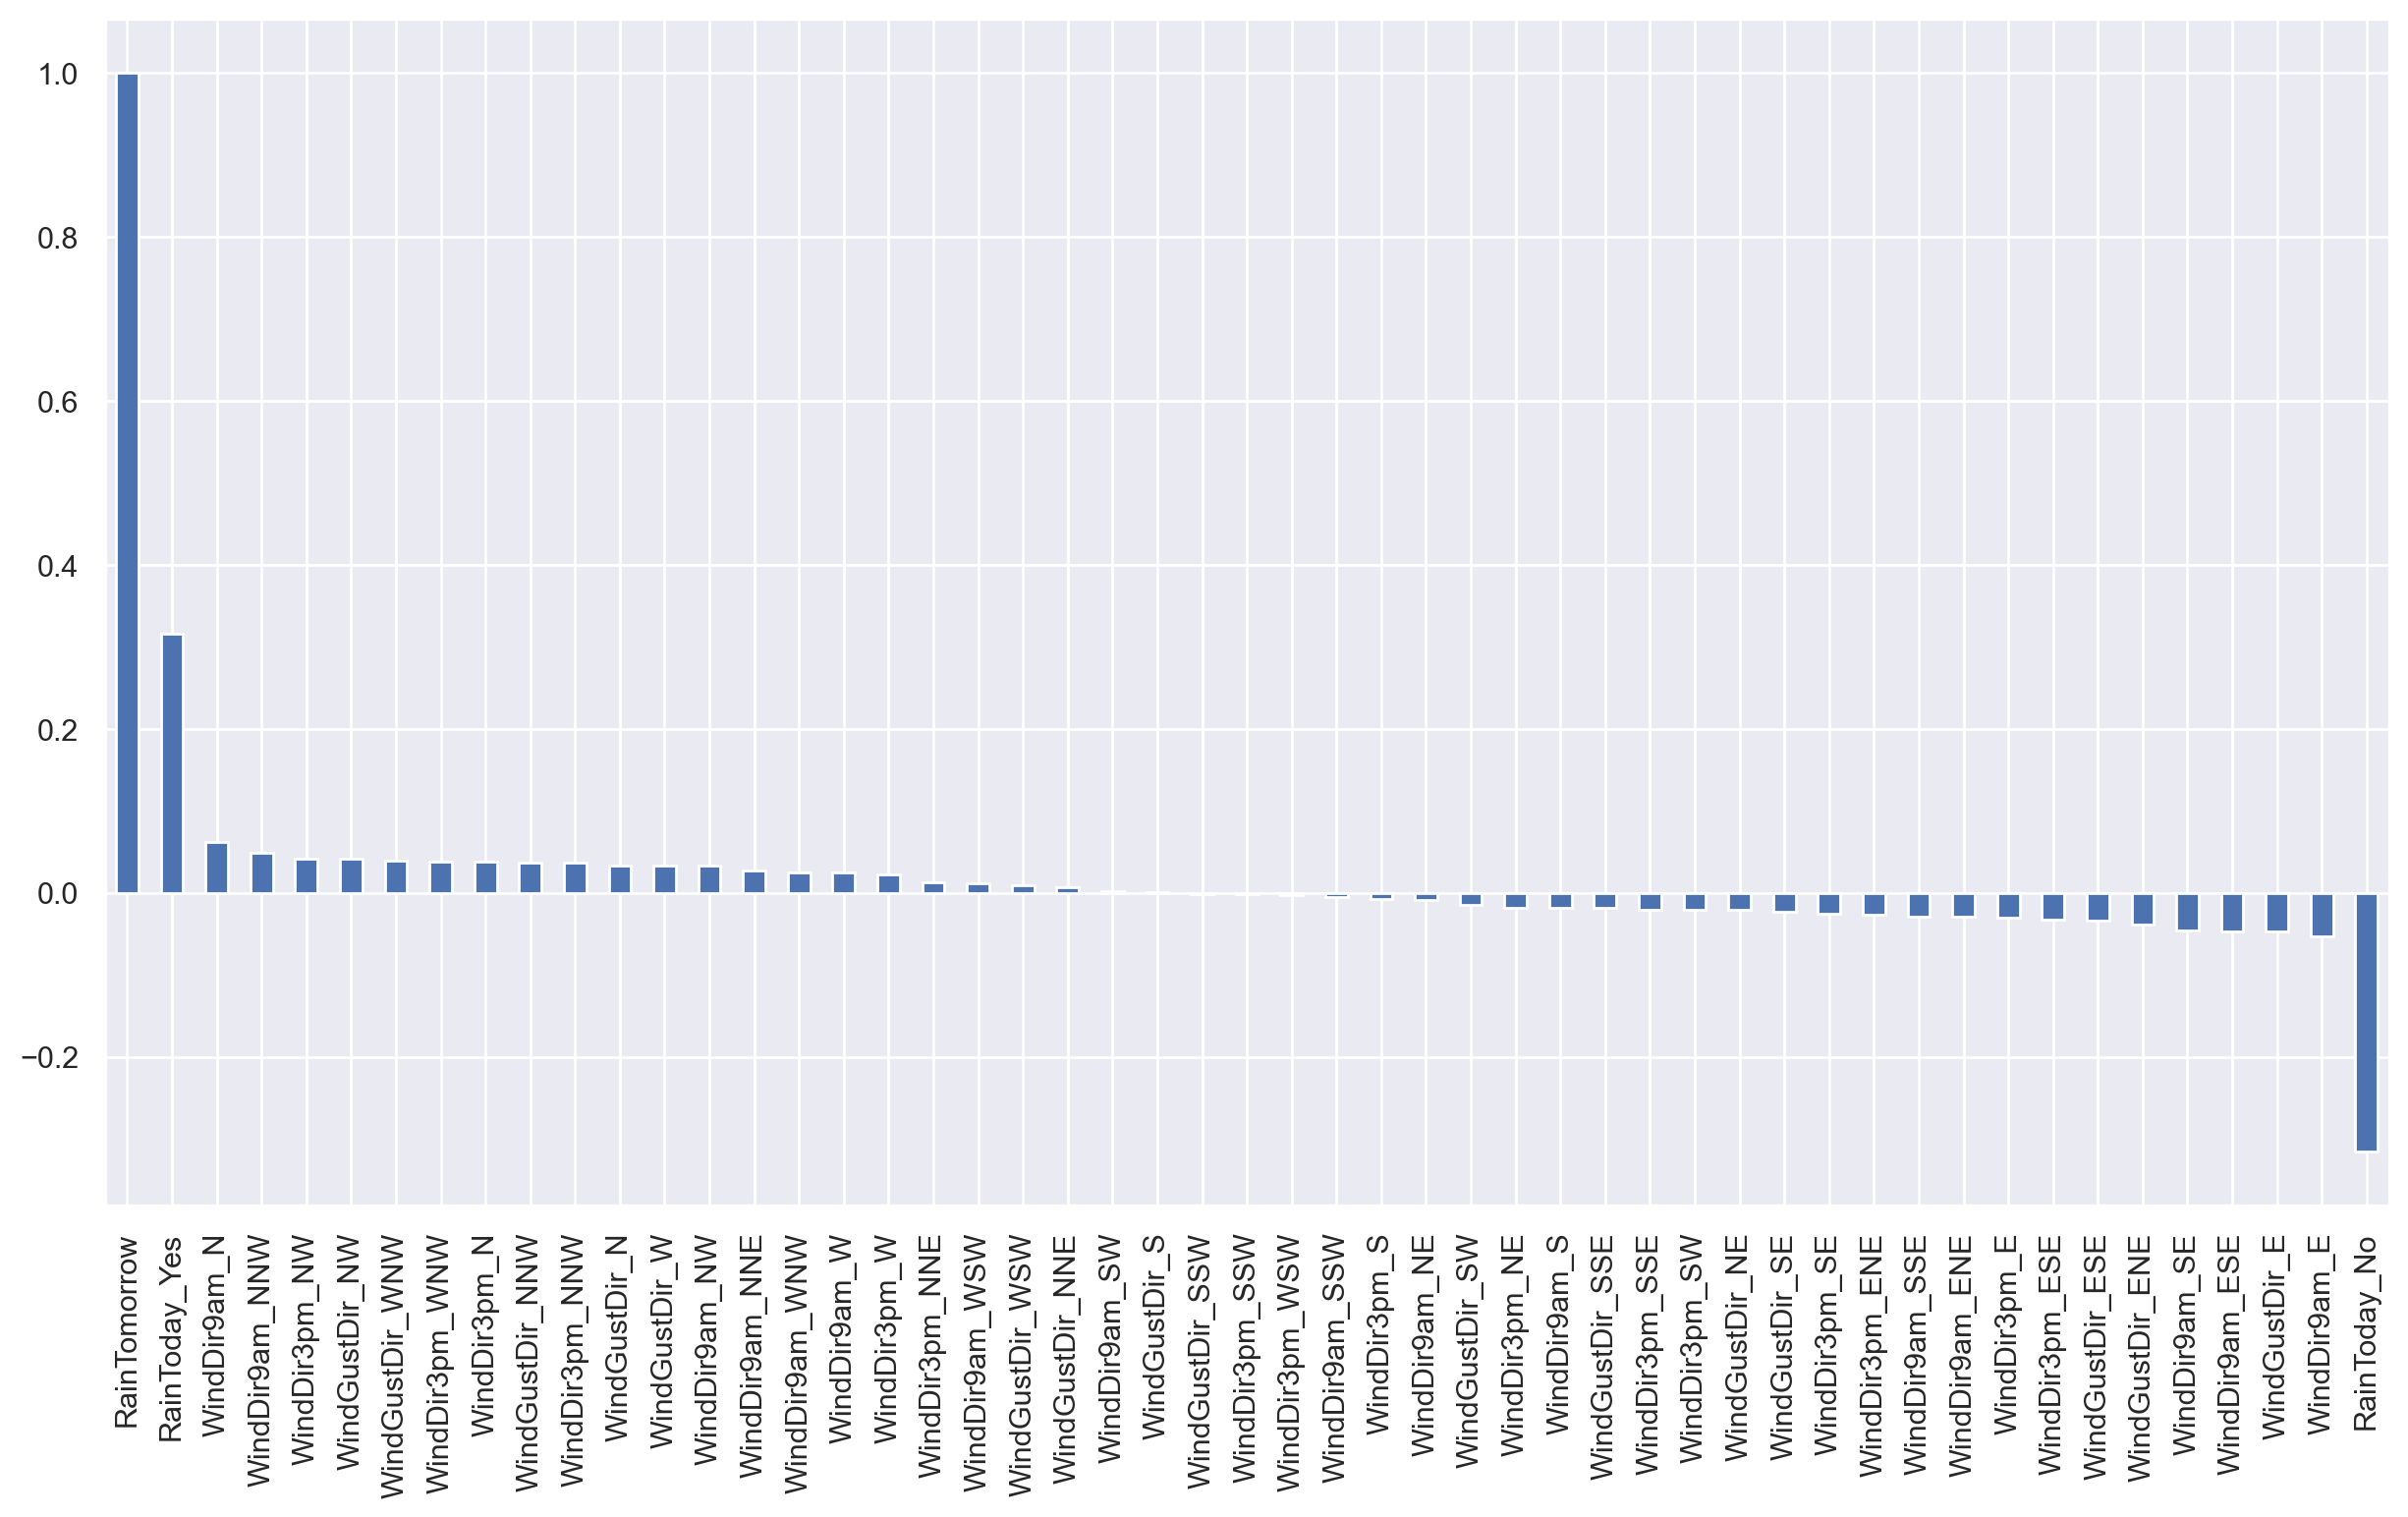

In [85]:
# Just for the categorical data
new_categorical_cols = ['WindGustDir',
                         'WindDir9am',
                         'WindDir3pm',
                         'RainToday',
                         'RainTomorrow']
weather_dummies_cat = pd.get_dummies(weather[new_categorical_cols])
sns.set()
plt.figure(figsize=(15,8), dpi=200)
weather_dummies_cat.corr()['RainTomorrow'].sort_values(ascending = False).plot(kind='bar')

#### 3.3 Insight analysis

Text(0.5, 1.0, 'Overlapping')

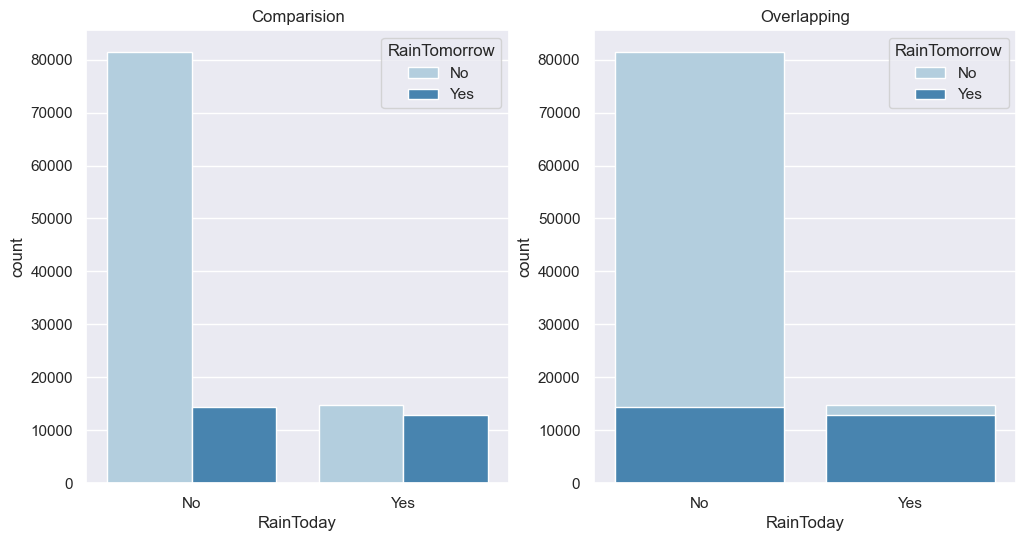

In [86]:
his_weather = weather.copy()

his_weather['RainTomorrow'].replace(to_replace=1, value='Yes', inplace=True)
his_weather['RainTomorrow'].replace(to_replace=0, value='No', inplace=True)
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi=100)

plt.subplot(121)
sns.countplot(x="RainToday",hue="RainTomorrow",data=his_weather,palette="Blues", dodge=True)
plt.xlabel("RainToday")
plt.title("Comparision")

plt.subplot(122)
sns.countplot(x="RainToday",hue="RainTomorrow",data=his_weather,palette="Blues", dodge=False)
plt.xlabel("RainToday")
plt.title("Overlapping")

From the histogram shown above, it indicates that if 'RainToday' is 'Yes', it is likely taht tomorrow is rainy day.

### 4. Machine Learning

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [89]:
weather = weather.drop(columns = ['Date','Location'])
weather.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0
1,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0
2,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0
3,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,0
4,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [90]:
data_dummies = pd.get_dummies(weather)
data_dummies.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,4.8,8.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,4.8,8.6,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,4.8,8.6,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,4.8,8.6,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,4.8,8.6,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
# convert the DataFrame to a numpy array
new_data = np.array(data_dummies)
data = new_data[:, :-1]
target = new_data[:,-1]

# normalise feature values to range [0,1]
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, target,
                                                    test_size=0.25, random_state=42)
print("X_train_full shape:", X_train.shape)
print("y_train_full shape:", y_train.shape)

X_train_full shape: (92782, 66)
y_train_full shape: (92782,)


In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("f1_score: {:.4f}".format(f1_score(y_test, y_pred)))

accuracy: 0.9771
f1_score: 0.9463


#### 4.1 Hyperparameter Tuning

In [ ]:
param_grid = {'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'n_neighbors': [1, 5, 10]
             }
grid_search_cv = GridSearchCV(knn, param_grid)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

In [99]:
knn_fin = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')
knn_fin.fit(X_train, y_train)
y_pred_knn = knn_fin.predict(X_test)
print("accuracy: {:.4f}".format(accuracy_score(y_pred_knn, y_test)))
print("f1_score: {:.4f}".format(f1_score(y_pred_knn, y_test)))

accuracy: 0.9820
f1_score: 0.9581
